In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

from blg_strain.bands import get_bands
from blg_strain.berry import berry_mu, berry_connection, berry_from_connection
from blg_strain.utils.utils import get_splines
from blg_strain.utils.utils import densify
from blg_strain.microscopic import feq_func
from blg_strain.macroscopic import D_valley, ntot_func, D_func, n_valley, M_valley

ImportError: cannot import name 'D_func' from 'blg_strain.macroscopic' (c:\users\brian\documents\github\blg_strain\blg_strain\macroscopic.py)

In [ ]:
%matplotlib notebook

In [35]:
delta = 0.01
Delta = 0.01

kx, ky, Kx, Ky, E, Psi = get_bands(Nkx=200, Nky=200, Delta=Delta, delta=delta, twobytwo=True)
Omega, Mu = berry_mu(Kx, Ky, E, Psi)
splE, splO, splM = get_splines(kx, ky, E, Omega, Mu)
kx2, ky2, E2, Omega2, Mu2 = densify(kx, ky, splE, splO, splM)

In [36]:
EF = 0.015
T = 0

f = feq_func(E2, EF, T)
M = M_valley(kx2, ky2, f, splE, splO, splM, Efield=[1,0], tau=.1, EF=EF)

<IPython.core.display.Javascript object>


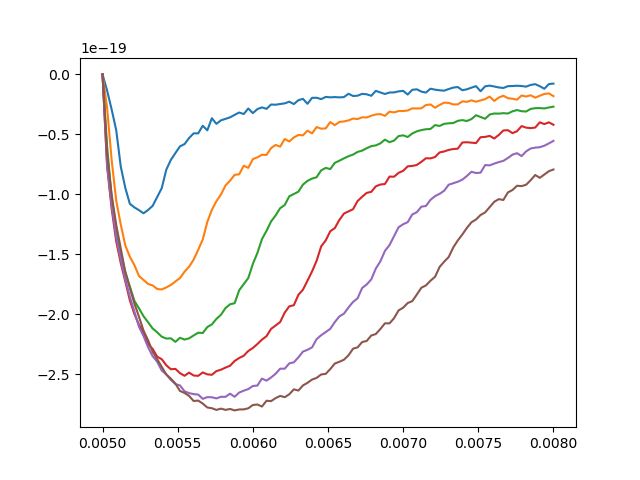

In [37]:
EFs = np.linspace(0.005,0.008, 100)
deltas = [.001, .002, .003, 0.004, 0.005, 0.006]
Ms = np.empty_like(EFs)

fig, ax = plt.subplots()

for delta in deltas:
    kx, ky, Kx, Ky, E, Psi = get_bands(Nkx=200, Nky=200, Delta=Delta, delta=delta, twobytwo=True)
    Omega, Mu = berry_mu(Kx, Ky, E, Psi)
    splE, splO, splM = get_splines(kx, ky, E, Omega, Mu)
    kx2, ky2, E2, Omega2, Mu2 = densify(kx, ky, splE, splO, splM)
    
    for i, EF in enumerate(EFs):
        f = feq_func(E2, EF, T)
        Ms[i] = M_valley(kx2, ky2, f, splE, splO, splM, Efield=[1,0], tau=.1, EF=EF)

    ax.plot(EFs, Ms)

In [18]:
feq_func(E2, 0.01, 0).any()

True

# Carrier density and displacement field

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

from blg_strain.bands import get_bands
from blg_strain.berry import berry_mu, berry_connection, berry_from_connection
from blg_strain.utils.utils import get_splines
from blg_strain.utils.utils import densify
from blg_strain.microscopic import feq_func
from blg_strain.macroscopic import *

In [22]:
delta = 0
Delta = 0.01

kx, ky, Kx, Ky, E, Psi = get_bands(Nkx=200, Nky=200, Delta=Delta, delta=delta)
Omega, Mu = berry_mu(Kx, Ky, E, Psi)
splE, splO, splM = get_splines(kx, ky, E, Omega, Mu)
kx2, ky2, E2, Omega2, Mu2 = densify(kx, ky, splE, splO, splM)

kxp, kyp, Kxp, Kyp, Ep, Psip = get_bands(Nkx=200, Nky=200, xi=1, Delta=Delta, delta=delta)
Omegap, Mup = berry_mu(Kxp, Kyp, Ep, Psip)
splEp, splOp, splMp = get_splines(kxp, kyp, Ep, Omegap, Mup)
kx2p, ky2p, E2p, Omega2p, Mu2p = densify(kxp, kyp, splEp, splOp, splMp)

In [23]:
EF = 0.01
T = 0

feq1 = feq_func(E, EF, T)
feq2 = feq_func(Ep, EF, T)

n1 = n_layer(kx, ky, feq1, feq2, Psi, Psip, layer=1)
n2 = n_layer(kx, ky, feq1, feq2, Psi, Psip, layer=2)

disp_field(Delta, n1, n2)

NameError: name 'n_layer' is not defined

In [ ]:
n1, n2

# Object oriented

In [38]:
class Bands():
    def __init__(self, **kwargs):
        self.kx, self.ky, self.Kx, self.Ky, self.E, self.Psi = get_bands(**kwargs)
        self.Omega, self.Mu = berry_mu(self.Kx, self.Ky, self.E, self.Psi)
        self.splE, self.splO, self.splM = get_splines(kx, ky, E, Omega, Mu)
        kx2, ky2, E2, Omega2, Mu2 = densify(kx, ky, splE, splO, splM)

In [39]:
b = Bands()

In [42]:
from blg_strain.valley import Valley

In [43]:
v1 = Valley(xi=1)
v2 = Valley(xi=-1)

In [46]:
v1.calculate()

In [22]:
v2.calculate()

# Import from module

In [1]:
from blg_strain.classes import *
from blg_strain.microscopic import feq_func

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [20]:
bs1 = BandStructure(xi=1, delta=0.001, Delta=0.01)
bs2 = BandStructure(xi=-1, delta=0.0, Delta=0.01)

In [21]:
bs1.calculate(1000, 1000)
bs2.calculate(1000, 1000)

## E field in x direction 

In [22]:
from blg_strain.macroscopic import _M_bands

### integrate not by parts

In [31]:
EFs = np.linspace(0.005,0.008, 10)
T=0.1

_M1 = np.empty((len(EFs), 2))
_M2 = np.empty((len(EFs), 2))

for i, EF in enumerate(EFs):
    for M, bs in zip([_M1, _M2], [bs1, bs2]):
        f = feq_func(bs.E, EF, T)
        M[i] = _M_bands(bs.kx, bs.ky, f, bs.splE, bs.splO, bs.splM, tau=.1, EF=EF, byparts=False)

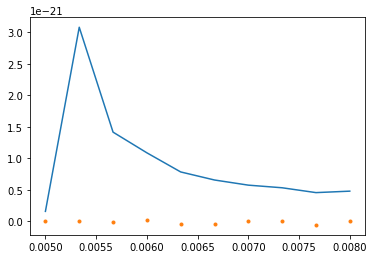

In [32]:
Efield = [1,0]
M1 = _M1.dot(Efield)
M2 = _M2.dot(Efield)

fig, ax = plt.subplots()
ax.plot(EFs, M1)
ax.plot(EFs, M2, '.')

### integrate by parts

In [33]:
EFs = np.linspace(0.005,0.008, 10)
T=0.1

_M1 = np.empty((len(EFs), 2))
_M2 = np.empty((len(EFs), 2))

for i, EF in enumerate(EFs):
    for M, bs in zip([_M1, _M2], [bs1, bs2]):
        f = feq_func(bs.E, EF, T)
        M[i] = _M_bands(bs.kx, bs.ky, f, bs.splE, bs.splO, bs.splM, tau=.1, EF=EF, byparts=True)

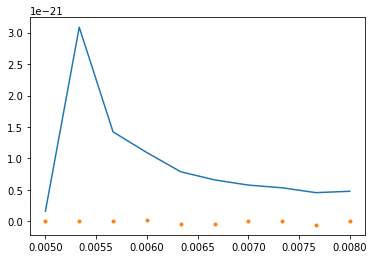

In [34]:
Efield = [1,0]
M1 = _M1.dot(Efield)
M2 = _M2.dot(Efield)

fig, ax = plt.subplots()
ax.plot(EFs, M1)
ax.plot(EFs, M2, '.')

# versus Temperature

In [1]:
from blg_strain.classes import *
from blg_strain.microscopic import feq_func
from blg_strain.macroscopic import _M_bands, _M_integral, _M_integral_by_parts

import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
bs1 = BandStructure(xi=1, delta=0.01, Delta=0.01)
bs2 = BandStructure(xi=-1, delta=0.01, Delta=0.01)

In [4]:
bs1.calculate(1000, 1000)
bs2.calculate(1000, 1000)

In [8]:
EF = 0.006
Ts = np.linspace(0,10, 10)

_M1 = np.empty((len(Ts), 2))
_M2 = np.empty((len(Ts), 2))
_M1p = np.empty((len(Ts), 2))
_M2p = np.empty((len(Ts), 2))

for i, T in enumerate(Ts):
    for M, Mp, bs in zip([_M1, _M2], [_M1p, _M2p], [bs1, bs2]):
        f = feq_func(bs.E, EF, T)
        M[i] = _M_bands(bs.kx, bs.ky, f, bs.splE, bs.splO, bs.splM, tau=.1, EF=EF, byparts=False)
        Mp[i] = _M_bands(bs.kx, bs.ky, f, bs.splE, bs.splO, bs.splM, tau=.1, EF=EF, byparts=True)

In [9]:
from blg_strain.utils.const import muB

<IPython.core.display.Javascript object>


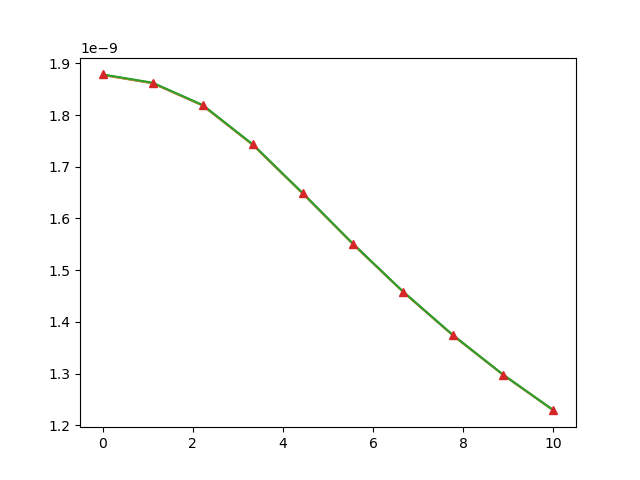

In [10]:
Efield = [1,0]
M1 = _M1.dot(Efield)/(muB*1e12)
M2 = _M2.dot(Efield)/(muB*1e12)
M1p = _M1p.dot(Efield)/(muB*1e12)
M2p = _M2p.dot(Efield)/(muB*1e12)

fig, ax = plt.subplots()
ax.plot(Ts, M1)
ax.plot(Ts, M2)
ax.plot(Ts, M1p, '-')
ax.plot(Ts, M2p, '^')

In [27]:
from blg_strain.utils.const import muB

In [32]:
9.274e-12 /(muB*1e12)

1.0000018864055644

## E field in y direction

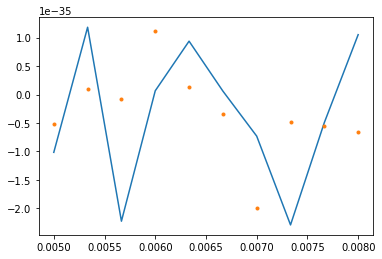

In [35]:
Efield = [0,1]
M1 = _M1.dot(Efield)
M2 = _M2.dot(Efield)

fig, ax = plt.subplots()
ax.plot(EFs, M1)
ax.plot(EFs, M2, '.')

# Strain along theta=90

In [36]:
bs1 = BandStructure(xi=1, delta=0.01, Delta=0.01, theta=np.pi/2)
bs2 = BandStructure(xi=-1, delta=0.01, Delta=0.01, theta=np.pi/2)

In [20]:
bs1.calculate()
bs2.calculate()

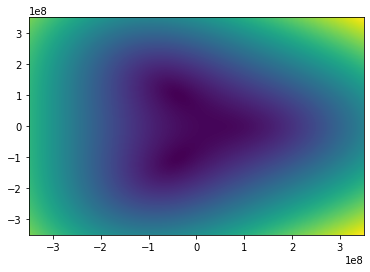

In [21]:
fig, ax = plt.subplots()
ax.pcolormesh(bs1.Kx, bs1.Ky, bs1.E[2])

## E field in x direction 

In [12]:
from blg_strain.macroscopic import _M_bands

In [13]:
EFs = np.linspace(0.005,0.008, 10)
T=0

_M1 = np.empty((len(EFs), 2))
_M2 = np.empty((len(EFs), 2))

for i, EF in enumerate(EFs):
    for M, bs in zip([_M1, _M2], [bs1, bs2]):
        f = feq_func(bs.E, EF, T)
        M[i] = _M_bands(bs.kx, bs.ky, f, bs.splE, bs.splO, bs.splM, tau=.1, EF=EF)

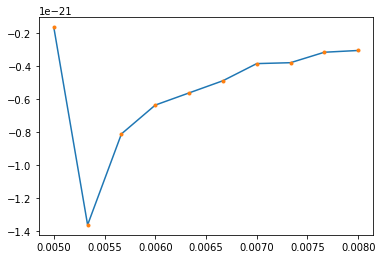

In [14]:
Efield = [1,0]
M1 = _M1.dot(Efield)
M2 = _M2.dot(Efield)

fig, ax = plt.subplots()
ax.plot(EFs, M1)
ax.plot(EFs, M2, '.')

## E field in y direction

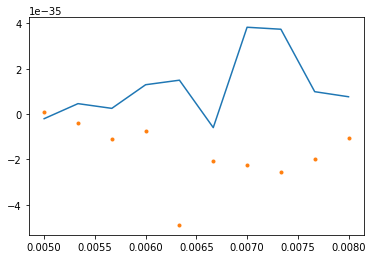

In [15]:
Efield = [0,1]
M1 = _M1.dot(Efield)
M2 = _M2.dot(Efield)

fig, ax = plt.subplots()
ax.plot(EFs, M1)
ax.plot(EFs, M2, '.')

# Try integrating *not* by parts

In [1]:
from blg_strain.classes import *
from blg_strain.microscopic import feq_func

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [61]:
bs1 = BandStructure(xi=1, delta=0.001, Delta=0.01)
bs2 = BandStructure(xi=-1, delta=0, Delta=0.01)

In [62]:
bs1.calculate(Nkx_new=1000, Nky_new=1000)
# bs2.calculate()

In [63]:
from blg_strain.macroscopic import _M_bands, _M_integral, _M_integral_by_parts

In [64]:
EF = 0.006
feq = feq_func(bs1.E, EF, 1)
M1 = _M_integral(bs1.kx, bs1.ky, feq[2], bs1.splE[2], bs1.splO[2], bs1.splM[2], tau=.1, EF=EF)
M2 = _M_integral_by_parts(bs1.kx, bs1.ky, feq[2], bs1.splE[2], bs1.splO[2], bs1.splM[2], tau=.1, EF=EF)

In [66]:
M1, M2

(array([ 1.04389447e-21, -4.32632461e-36]),
 array([ 1.05033584e-21, -3.10549632e-36]))

In [52]:
f = np.array(np.gradient(feq[2], bs1.kx, bs1.ky, axis=(-2, -1)))

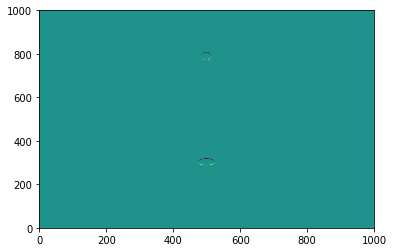

In [53]:
fig, ax = plt.subplots()
ax.pcolormesh(f[0])

In [31]:
from scipy.integrate import simps

In [42]:
x = np.linspace(0,5)
simps(2 * x, x)

25.0

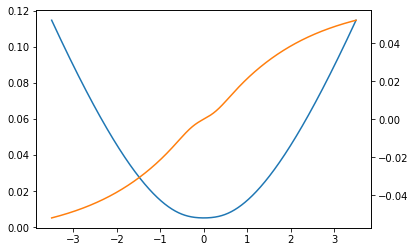

In [40]:
EE = bs1.splE[2](bs1.kx, bs1.ky)
dE_dky =  bs1.splE[2](bs1.kx, bs1.ky, dy=1)

fig, ax = plt.subplots()
i=1000
ax.plot(bs1.ky/1e8, EE[i, :])
ax2 = ax.twinx()
ax2.plot(bs1.ky/1e8, dE_dky[i, :]*1e8, 'C1')
# ax.pcolormesh(bs1.splE[2](bs1.kx, bs1.ky, dy=1))

In [35]:
bs1.splE[2](bs1.kx, bs1.ky)

array([[0.17326411, 0.17316138, 0.17305881, ..., 0.17305881, 0.17316138,
        0.17326411],
       [0.17309412, 0.1729913 , 0.17288863, ..., 0.17288863, 0.1729913 ,
        0.17309412],
       [0.17292426, 0.17282134, 0.17271857, ..., 0.17271857, 0.17282134,
        0.17292426],
       ...,
       [0.2152045 , 0.21502186, 0.21483926, ..., 0.21483926, 0.21502186,
        0.2152045 ],
       [0.21532656, 0.21514393, 0.21496135, ..., 0.21496135, 0.21514393,
        0.21532656],
       [0.21544867, 0.21526606, 0.21508349, ..., 0.21508349, 0.21526606,
        0.21544867]])

In [30]:
M1, M2

(array([9.00641088e-03, 1.31480825e-12]),
 array([7.24261843e-28, 2.24293957e-35]))

In [27]:
EFs = np.linspace(0.005,0.008, 10)
T=0

_M1 = np.empty((len(EFs), 2))
_M2 = np.empty((len(EFs), 2))

for i, EF in enumerate(EFs):
    for M, bs in zip([_M1, _M2], [bs1, bs2]):
        f = feq_func(bs.E, EF, T)
        M[i] = _M_bands(bs.kx, bs.ky, f, bs.splE, bs.splO, \
                        bs.splM, tau=.1, EF=EF, byparts=False)

In [28]:
M

array([[ 7.86622969e-24,  3.45063052e-34],
       [ 3.14015522e-23, -8.02977819e-34],
       [-8.38185017e-24, -2.88013215e-34],
       [-1.00501929e-23,  1.27580740e-34],
       [-2.43693426e-23, -1.07819346e-34],
       [-1.96524798e-23, -5.34835654e-35],
       [ 3.30505148e-24,  6.64010079e-35],
       [-1.85220270e-23, -2.01343947e-35],
       [-7.74163437e-24,  4.14611900e-35],
       [ 3.43222828e-23,  6.18085484e-36]])

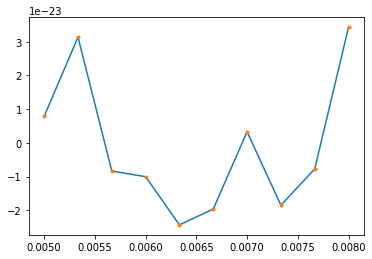

In [29]:
Efield = [1,0]
M1 = _M1.dot(Efield)
M2 = _M2.dot(Efield)

fig, ax = plt.subplots()
ax.plot(EFs, M1)
ax.plot(EFs, M2, '.')

## Try quad instead of simps

In [35]:
from scipy.integrate import dblquad, simps
from blg_strain.utils.const import q, hbar, muB

In [113]:
def _M_integral2(kx, ky, splgradfeq, splE, splO, splM, tau=0, EF=0):
    def func(ky, kx): # order specified by dblquad
        E = splE(kx, ky)
        O = splO(kx, ky)
        Mu = splM(kx, ky)

        # non-equilibrium occupation ("divided by" dot product with E field)
        # equilibrium term will integrate to zero
        f = q * tau / hbar * splgradfeq(kx, ky)

        integrand = 1 / (2 * np.pi) **2 * f * (Mu * muB + q * O / hbar * (EF - E))
        return integrand
      
#     return func(0, 0)
    integral, err = dblquad(func, kx.min(), kx.max(), ky.min(), ky.max(), epsabs=1e-100)
    integral2 = simps(simps(func(ky, kx), ky, axis=-1), kx, axis=-1)
    return integral, integral2, err

In [114]:
from scipy.interpolate import RectBivariateSpline
gradfeq = np.array(np.gradient(feq, bs1.kx, bs1.ky, axis=(-2, -1)))[0]
splgradfeq = RectBivariateSpline(bs1.kx, bs1.ky, gradfeq[2])

In [166]:
M1 = _M_integral2(bs1.kx, bs1.ky, splgradfeq, bs1.splE[2], bs1.splO[2], bs1.splM[2], tau=.1, EF=EF)
M2 = _M_integral(bs1.kx, bs1.ky, feq[2], bs1.splE[2], bs1.splO[2], bs1.splM[2], tau=.1, EF=EF)

NameError: name '_M_integral2' is not defined

In [116]:
M1, M2

((3.6099671602436266e-25, 3.610153108915174e-25, 4.066129140796916e-28),
 array([ 3.61015311e-25, -5.32019371e-36]))

# Integrate another function by parts

In [16]:
def ff(x, y):
    return np.exp(-(x**2+y**2))

def ffx(x,y):
    return -2*x*np.exp(-(x**2+y**2))

def gg(x, y):
    return np.exp(-((x-1)**2+(y+1)**2))

def ggx(x, y):
    return -2*(x-1)*np.exp(-((x-1)**2+(y+1)**2))

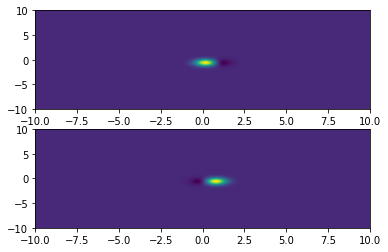

In [18]:
x = np.linspace(-10,10, 1000)
y = np.linspace(-10,10, 1000)
X, Y = np.meshgrid(x, y, indexing='ij')
fig, ax = plt.subplots(2)
ax[0].pcolormesh(X,Y, ff(X, Y)*ggx(X,Y))
ax[1].pcolormesh(X,Y, -ffx(X, Y)*gg(X,Y))

In [35]:
from scipy.integrate import simps

In [55]:
def integral(x, y, f, g):
    fx = np.gradient(f, x[:,0], axis=-2)
    return simps(simps(fx*g, y[0,:], axis=-1), x[:,0], axis=-1)

def integral_by_parts(x, y, f, g):
    gx = np.gradient(g, x[:,0], axis=-2)
    return -simps(simps(f*gx, y[0,:], axis=-1), x[:,0], axis=-1)
    

In [56]:
integral(X, Y, ff(X, Y), gg(X, Y)), integral_by_parts(X, Y, ff(X, Y),gg(X, Y))

(-0.5777864767183405, -0.5777864767183405)

In [169]:
from blg_strain.utils.const import *
tau = 0.01
EF = 0.01

kx = bs1.kx
ky = bs1.ky

In [217]:
feq = feq_func(bs1.E[2], EF, T=10)
feqx = np.array(np.gradient(feq, kx, ky, axis=(-2, -1)))

g = (bs1.Mu[2] * muB + q * bs1.Omega[2] / hbar * (EF- bs1.E[2]))

In [218]:
simps(simps(feqx * g, ky, axis=-1), kx, axis=-1)

array([ 7.33669212e-19, -1.01605806e-29])

In [219]:
# gx = np.gradient(g, kx, axis=-2)
E_grad = np.array([bs1.splE[2](kx, ky, dx=1), bs1.splE[2](kx, ky, dy=1)])
O_grad = np.array([bs1.splO[2](kx, ky, dx=1), bs1.splO[2](kx, ky, dy=1)])
Mu_grad = np.array([bs1.splM[2](kx, ky, dx=1), bs1.splM[2](kx, ky, dy=1)])

prefactor = - feq
gx = prefactor * (Mu_grad * muB \
    + q * O_grad / hbar * (EF - bs1.splE[2](kx, ky)) \
    + q * bs1.splO[2](kx, ky) / hbar * (-E_grad))

In [220]:
simps(simps(feq * gx, ky, axis=-1), kx, axis=-1)

array([ 5.48361335e-20, -2.91139744e-30])

In [104]:
bs1.splM[2](kx, ky, dy=1), np.gradient(bs1.Mu[2], ky, axis=-1)

(array([[ 1.56698035e-09,  1.56623719e-09,  1.56548163e-09, ...,
         -1.56548163e-09, -1.56623719e-09, -1.56698035e-09],
        [ 1.57359460e-09,  1.57285649e-09,  1.57210592e-09, ...,
         -1.57210592e-09, -1.57285649e-09, -1.57359460e-09],
        [ 1.58023664e-09,  1.57950365e-09,  1.57875814e-09, ...,
         -1.57875814e-09, -1.57950365e-09, -1.58023664e-09],
        ...,
        [ 1.57131779e-09,  1.57511314e-09,  1.57891947e-09, ...,
         -1.57891947e-09, -1.57511314e-09, -1.57131779e-09],
        [ 1.56940815e-09,  1.57319634e-09,  1.57699549e-09, ...,
         -1.57699549e-09, -1.57319634e-09, -1.56940815e-09],
        [ 1.56749939e-09,  1.57128043e-09,  1.57507240e-09, ...,
         -1.57507240e-09, -1.57128043e-09, -1.56749939e-09]]),
 array([[ 1.56660981e-09,  1.56623512e-09,  1.56547956e-09, ...,
         -1.56547956e-09, -1.56623512e-09, -1.56660981e-09],
        [ 1.57322658e-09,  1.57285441e-09,  1.57210384e-09, ...,
         -1.57210384e-09, -1.57285441e

In [42]:
kx, ky = bs1.kx, bs1.ky
feq = feq_func(bs1.E[2], EF, T=30)
feqx = np.array(np.gradient(feq, kx, ky, axis=(-2, -1)))

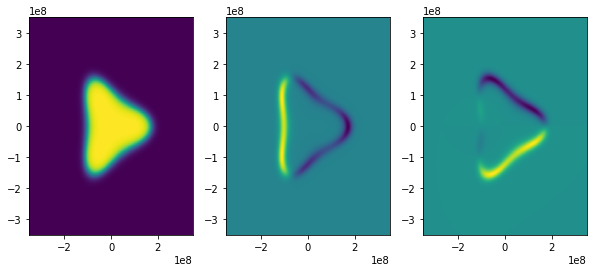

In [43]:
fig, ax = plt.subplots(ncols=3, figsize=(10,4))
ax[0].pcolormesh(kx, ky, feq.T)
ax[1].pcolormesh(kx, ky, feqx[0].T)
ax[2].pcolormesh(kx, ky, feqx[1].T)

# 6/22/2020

In [1]:
from blg_strain.classes import *
from blg_strain.microscopic import feq_func
from blg_strain.macroscopic import _M_bands, _M_integral, _M_integral_by_parts
from blg_strain.utils.const import *

import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [15]:
bs = BandStructure(xi=1, delta=0.01, Delta=0.01)
bs2 = BandStructure(xi=-1, delta=0.01, Delta=0.01)

In [16]:
bs.calculate(1000, 1000)
bs2.calculate(1000, 1000)

In [31]:
EF = 0.010
T = 0

f = feq_func(bs.E, EF, T)
f2 = feq_func(bs2.E, EF, T)
M1 = _M_bands(bs.kx, bs.ky, f, bs.splE, bs.splO, bs.splM, tau=1e-12, EF=EF, byparts=True)
M2 = _M_bands(bs2.kx, bs2.ky, f, bs2.splE, bs2.splO, bs2.splM, tau=1e-12, EF=EF, byparts=True)

In [32]:
M1 * 100, M2 * 100

(array([1.66767918e+00, 1.13423638e-13]),
 array([-1.31587058e+01,  5.18396401e-15]))

In [ ]:
Mtot = _M

In [8]:
for i in range(4):
    print(_M_integral(bs.kx, bs.ky, f[i], bs.splE[i], bs.splO[i], bs.splM[i], tau=1e-12, EF=EF))

[0. 0.]
[0. 0.]
[8.42339299e-02 9.27344751e-16]
[0. 0.]


In [72]:
kx, ky = bs.kx, bs.ky

splE = bs.splE[2]
splO = bs.splO[2]
splM = bs.splM[2]

E = splE(kx, ky)
O = splO(kx, ky)
Mu = splM(kx, ky)

E_grad = np.array([splE(kx, ky, dx=1), splE(kx, ky, dy=1)])
O_grad = np.array([splO(kx, ky, dx=1), splO(kx, ky, dy=1)])
Mu_grad = np.array([splM(kx, ky, dx=1), splM(kx, ky, dy=1)])

feq = feq_func(bs.E[2], EF, T)


## Integral not-by-parts

In [79]:
term1 = Mu
term2 = q / hbar * O * (EF-E) / muB
term0 = q / hbar * O * EF / muB
fnoneq = np.array(np.gradient(feq, kx, ky, axis=(-2, -1)))

integrand = 1 / (2 * np.pi) ** 2 * fnoneq *(term1 + term2)

<IPython.core.display.Javascript object>


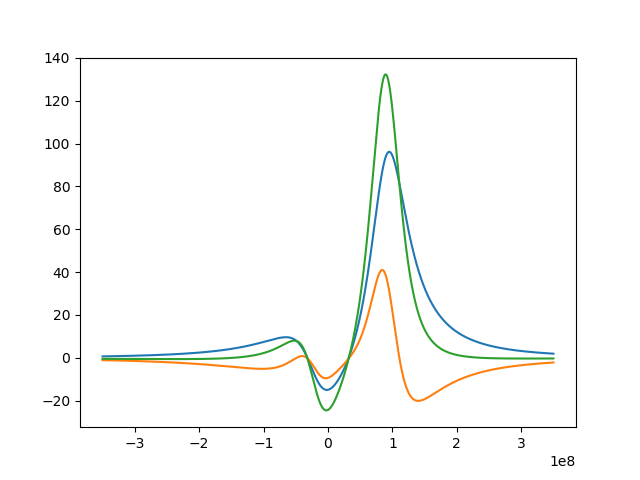

In [80]:
fig, ax = plt.subplots()
ax.plot(kx, term1[:, 500])
ax.plot(kx, term2[:, 500])
ax.plot(kx, (term1+term2)[:,500])

# ax.plot(kx, f[2][:,500])

<IPython.core.display.Javascript object>


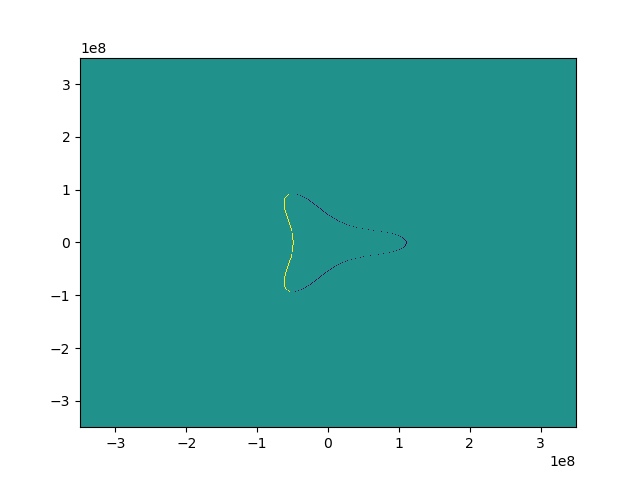

In [78]:
fig, ax = plt.subplots()
ax.pcolormesh(kx, ky, fnoneq[0].T)

In [81]:
from scipy.integrate import simps

In [82]:
I = simps(simps(integrand, ky, axis=-1), kx, axis=-1) # 
I  # Bohr magneton / meter

array([5.41974873e+05, 3.19371101e-07])

In [83]:
I * q * 1e-12 / hbar

array([1.31924383e-10, 7.77394623e-23])

## integral by parts

In [32]:
term1 = Mu_grad
term2 = q / hbar * O_grad * (EF - bs.E[2]) / muB
term3 = -q/hbar * O * E_grad / muB

prefactor = - f[2]/(2*np.pi)**2 * q * 1e-12 / hbar_J
integrand = prefactor * (term1 + term2 + term3)

<IPython.core.display.Javascript object>


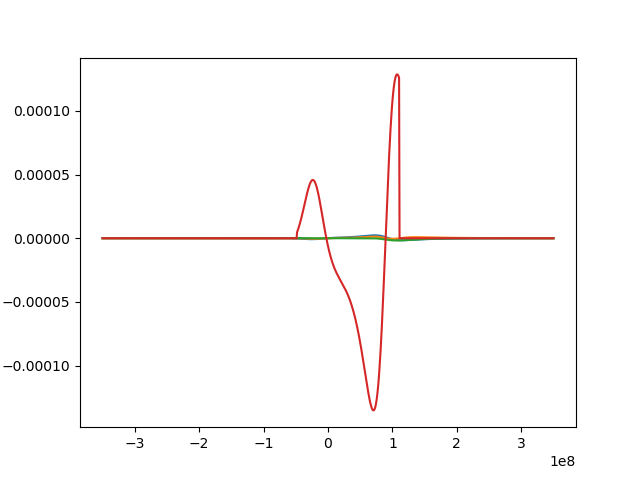

In [33]:
fig, ax = plt.subplots()
ax.plot(kx, term1[0][:, 500])
ax.plot(kx, term2[0][:, 500])
ax.plot(kx, term3[0][:, 500])
ax.plot(kx, integrand[0,:,500])

# ax.plot(kx, f[2][:,500])

In [30]:
from scipy.integrate import simps

In [34]:
I = simps(simps(integrand, ky, axis=-1), kx, axis=-1) # 
I

array([8.26319772e+08, 4.56777981e-04])

In [35]:
I * 1e-12 

array([8.26319772e-04, 4.56777981e-16])

In [57]:
integrand = f[2] * Mu * muB

In [59]:
integrand.shape

(4, 1000, 1000)

# Integrate using approximations from Fai/Jie paper

In [1]:
from blg_strain.classes import *
from blg_strain.microscopic import feq_func
from blg_strain.macroscopic import _M_bands, _M_integral, _M_integral_by_parts
from blg_strain.utils.const import *

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [2]:
%matplotlib notebook

In [3]:
from blg_strain.utils.utils import make_grid

In [37]:
kx, ky, Kx, Ky = make_grid([-0.35e9, 0.35e9], [-0.35e9, 0.35e9], 1000, 1000)

Delta = 2 * q # to Joules
vF = 0.6e6 # m/s
m = Delta/(2*vF**2)
strain = 0.01

def E_func(x, y):
    return Delta/2 + hbar_J**2 * (x**2+y**2)/(2*m)

E = E_func(Kx, Ky)
k0 = strain * Delta / (2 * hbar_J * vF)
O = hbar_J**2 * vF**2 * Delta/ (4 * E_func(Kx, Ky+k0)**3)
O2 = hbar_J**2 * vF**2 * Delta/ (4 * E_func(Kx, Ky-k0)**3)

<IPython.core.display.Javascript object>


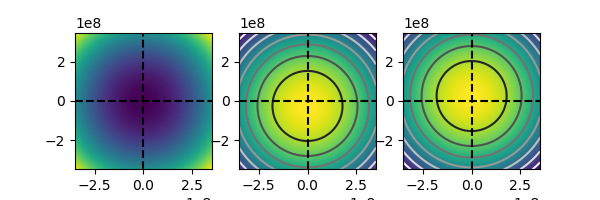

In [47]:
fig, ax = plt.subplots(ncols=3, figsize=(6,2))
ax[0].pcolormesh(Kx, Ky, E)
ax[1].pcolormesh(Kx, Ky, O)
ax[1].contour(Kx, Ky, O, cmap='Greys')
ax[2].pcolormesh(Kx, Ky, O2)
ax[2].contour(Kx, Ky, O2, cmap='Greys')

for i in range(3):
    ax[i].axhline(0, ls='--', c='k')
    ax[i].axvline(0, ls='--', c='k')
    ax[i].set_aspect(1)

### Integrating Omega

In [103]:
tau = 1e-12
prefactor = - q**2 * tau / hbar_J **2 * Delta * 100 / (2*np.pi)**2

In [104]:
EF = 5e-3 * q # eV to J
f = feq_func(E, EF+Delta/2, 0)

O_grad = np.array(np.gradient(O, kx, ky, axis=(-2, -1)))
O2_grad = np.array(np.gradient(O2, kx, ky, axis=(-2, -1)))

integrand = f * (O_grad - O2_grad)

<IPython.core.display.Javascript object>


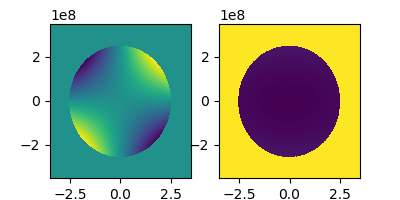

In [105]:
fig, ax = plt.subplots(ncols=2, figsize=(4,2))
ax[0].pcolormesh(Kx, Ky, integrand[0]) # will integrate to zero
ax[1].pcolormesh(Kx, Ky, integrand[1])

In [87]:
from scipy.integrate import simps

In [106]:
simps(simps(prefactor * integrand[1], kx, axis=-2), ky, axis=-1) / 1e-12

0.6834113463348288

### Integrating energy (approximation used in changing integration variable)

In [119]:
tau = 1e-12
prefactor = - q**2 * tau / hbar_J **2 * Delta * 100 / (2*np.pi)**2 * -6 * hbar_J**2/(m*Delta**2)

<IPython.core.display.Javascript object>


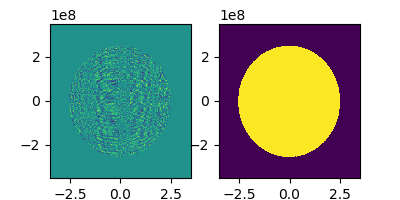

In [120]:
EF = 5e-3 * q # eV to J
f = feq_func(E, EF+Delta/2, 0)

E_grad = np.array(np.gradient(E_func(Kx, Ky + k0), kx, ky, axis=(-2, -1)))
E2_grad = np.array(np.gradient(E_func(Kx, Ky - k0), kx, ky, axis=(-2, -1)))

integrand = f * (E_grad - E2_grad)

fig, ax = plt.subplots(ncols=2, figsize=(4,2))
ax[0].pcolormesh(Kx, Ky, integrand[0]) # will integrate to zero
ax[1].pcolormesh(Kx, Ky, integrand[1])

In [109]:
from scipy.integrate import simps

In [121]:
simps(simps(prefactor * integrand[1], kx, axis=-2), ky, axis=-1) / 1e-12

0.6973193405124223

# Fai Jie no approx

In [139]:
from blg_strain.classes import *
from blg_strain.microscopic import feq_func
from blg_strain.macroscopic import _M_bands, _M_integral, _M_integral_by_parts
from blg_strain.utils.const import *

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [140]:
%matplotlib notebook

In [141]:
from blg_strain.utils.utils import make_grid

In [335]:
kx, ky, Kx, Ky = make_grid([-0.35e9, 0.35e9], [-0.35e9, 0.35e9], 1000, 1000)

Delta = 2
vF = 0.6e6 # m/s
m = Delta/(2*vF**2)
strain = 0.01

def Hfunc(kx, ky, xi):
    return hbar * vF * (np.array([[0*Kx, Kx],[Kx, 0*Kx]])  \
                    + 1j * xi * np.array([[0*Kx, -Ky],[Ky, 0*Kx]]))  \
                    + Delta/2 * np.array([[Ky/Ky, 0*Kx],[0*Kx, -Ky/Ky]]) \
                    + xi * strain * hbar * vF * np.array([[Ky, 0*Kx],[0*Kx, Ky]])

H1 = Hfunc(Kx, Ky, 1)
H2 = Hfunc(Kx, Ky, -1)

In [336]:
H1.shape

(2, 2, 1000, 1000)

## Compare analytical and numerical solutions

In [337]:
bs1 = BandStructure(xi=1, ham=H1, Nkx=1000, Nky=1000)
bs2 = BandStructure(xi=-1, ham=H2, Nkx=1000, Nky=1000)

bs1.calculate(1000, 1000)
bs2.calculate(1000, 1000)

def E_func1(x, y):
    return 1/2 * np.sqrt(Delta**2 + 4 * hbar**2 * vF**2 * (x**2+y**2))

def E_func(x, y, band=1, xi=1):
    return band * E_func1(x,y) + xi * strain * hbar * vF * y

E1 = E_func(bs1.Kx, bs1.Ky, 1, 1)
E2 = E_func(bs1.Kx, bs1.Ky, 1, -1)

def O_func_psi(kx, ky, Psi):
    Psi_x, Psi_y = np.array(np.gradient(Psi, kx, ky, axis=(-2, -1)))
    
    return 1j * (Psi_x[0].conjugate() * Psi_y[0]
                -Psi_y[0].conjugate() * Psi_x[0]
                +Psi_x[1].conjugate() * Psi_y[1]
                -Psi_y[1].conjugate() * Psi_x[1]
                )

def O_func(E, xi=1):
    return - xi * hbar ** 2 * vF**2 * Delta / (4 * E**3)

O1 = O_func(E_func1(bs1._Kx, bs1._Ky), xi=1)
O2 = O_func(E_func1(bs1._Kx, bs1._Ky), xi=-1)

O1p = O_func_psi(bs1._kx, bs1._ky, bs1._Psi[1]).real
O2p = O_func_psi(bs2._kx, bs2._ky, bs2._Psi[1]).real

In [338]:
(bs1.E[1]-E1).max(), (bs2.E[1]-E2).max(), (E1.max()-E1.min())

(1.9984014443252818e-15, 1.7763568394002505e-15, 0.02035901781177185)

In [342]:
(bs1._Omega[1]-O1).max(), (bs2._Omega[1]-O2).max(), (O1.max()-O1.min()), (O2.max()-O2.min())

(8.12595138446057e-20,
 5.794477811810072e-19,
 4.265443092930562e-21,
 4.265443092930562e-21)

In [343]:
(O1p-O1).max(), (O2p-O2).max(), (O1.max()-O1.min()), (O2.max()-O2.min())

(4.478774183870946e-27,
 6.1426601166420126e-24,
 4.265443092930562e-21,
 4.265443092930562e-21)

Energies agree, Berry curvatures do not

<IPython.core.display.Javascript object>


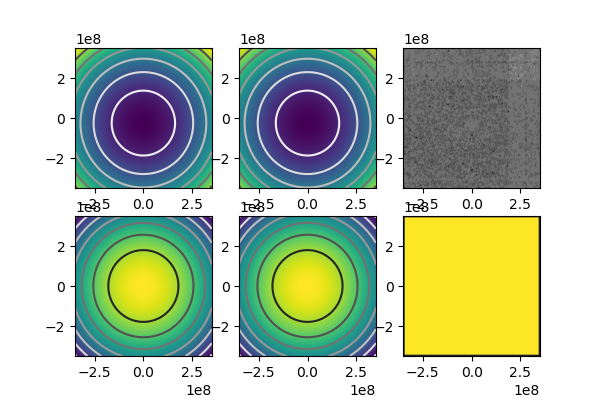

In [346]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(6,4))
ax[0,0].pcolormesh(bs1.Kx, bs1.Ky, bs1.E[1])
ax[0,0].contour(bs1.Kx, bs1.Ky, bs1.E[1], cmap='Greys')
ax[0,1].pcolormesh(bs1.Kx, bs1.Ky, E1)
ax[0,1].contour(bs1.Kx, bs1.Ky, E1, cmap='Greys')
ax[0,2].pcolormesh(bs1.Kx, bs1.Ky, E1-bs1.E[1])
ax[0,2].contour(bs1.Kx, bs1.Ky, E1-bs1.E[1], cmap='Greys')

# ax[1,0].pcolormesh(bs1._Kx, bs1._Ky, bs2._Omega[1])
# ax[1,0].contour(bs1._Kx, bs1._Ky, bs2._Omega[1], cmap='Greys')
# ax[1,1].pcolormesh(bs1._Kx, bs1._Ky, O2)
# ax[1,1].contour(bs1._Kx, bs1._Ky, O2, cmap='Greys')
# ax[1,2].pcolormesh(bs1._Kx, bs1._Ky, O2-bs2._Omega[1])
# ax[1,2].contour(bs1._Kx, bs1._Ky, O2-bs2._Omega[1], cmap='Greys')

ax[1,0].pcolormesh(bs1._Kx, bs1._Ky, O2)
ax[1,0].contour(bs1._Kx, bs1._Ky, O2, cmap='Greys')
ax[1,1].pcolormesh(bs1._Kx, bs1._Ky, O2p)
ax[1,1].contour(bs1._Kx, bs1._Ky, O2p, cmap='Greys')
ax[1,2].pcolormesh(bs1._Kx, bs1._Ky, O2-O2p)
ax[1,2].contour(bs1._Kx, bs1._Ky, O2-O2p, cmap='Greys')

In [348]:
(O2-O2p)/O2

array([[-8.33266595e-05, -4.16390883e-05, -4.16410955e-05, ...,
        -4.16410956e-05, -4.16390882e-05, -8.33266594e-05],
       [-4.16390878e-05,  5.09865681e-08,  5.09985208e-08, ...,
         5.09986243e-08,  5.09866350e-08, -4.16390879e-05],
       [-4.16410957e-05,  5.09988650e-08,  5.10109679e-08, ...,
         5.10109320e-08,  5.09986223e-08, -4.16410958e-05],
       ...,
       [-4.16410957e-05,  5.09988311e-08,  5.10111058e-08, ...,
         5.10110699e-08,  5.09987295e-08, -4.16410957e-05],
       [-4.16390881e-05,  5.09865322e-08,  5.09985888e-08, ...,
         5.09988311e-08,  5.09865996e-08, -4.16390883e-05],
       [-8.33266595e-05, -4.16390883e-05, -4.16410956e-05, ...,
        -4.16410957e-05, -4.16390881e-05, -8.33266594e-05]])

<IPython.core.display.Javascript object>


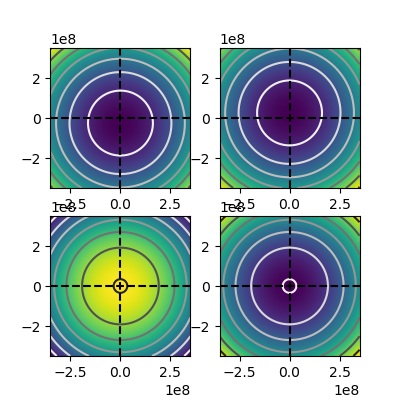

In [221]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(4,4))
ax[0,0].pcolormesh(bs1.Kx, bs1.Ky, bs1.E[1])
ax[0,0].contour(bs1.Kx, bs1.Ky, bs1.E[1], cmap='Greys')
ax[1,0].pcolormesh(bs1.Kx, bs1.Ky, bs1.Omega[1])
ax[1,0].contour(bs1.Kx, bs1.Ky, bs1.Omega[1], cmap='Greys')

ax[0,1].pcolormesh(bs2.Kx, bs2.Ky, bs2.E[1])
ax[0,1].contour(bs2.Kx, bs2.Ky, bs2.E[1], cmap='Greys')
ax[1,1].pcolormesh(bs2.Kx, bs2.Ky, bs2.Omega[1])
ax[1,1].contour(bs2.Kx, bs2.Ky, bs2.Omega[1], cmap='Greys')

for i in range(2):
    for j in range(2):
        ax[i,j].axhline(0, ls='--', c='k')
        ax[i,j].axvline(0, ls='--', c='k')
        ax[i,j].set_aspect(1)

In [224]:
EF, Delta/2

(1.005, 1.0)

In [225]:
T = 0
EF = 5e-3 + Delta/2 # eV

f1 = feq_func(bs1.E, EF, 0)
M1 = _M_bands(bs1.kx, bs1.ky, f1, bs1.splE, bs1.splO, bs1.splM, tau=1e-12, EF=EF)
f2 = feq_func(bs2.E, EF, 0)
M2 = _M_bands(bs2.kx, bs2.ky, f2, bs2.splE, bs2.splO, bs2.splM, tau=1e-12, EF=EF)

In [227]:
(M1 + M2) * 100

array([ 0.        , -5.82779127])

#### Check derivative of energy

In [304]:
def E_kx_func(x, y, E):
    return hbar**2 * vF**2 / E * x

E_kx = E_kx_func(bs1.Kx, bs1.Ky, bs1.E[1])
E_kx_num = np.gradient(bs1.E[1], bs1.kx, axis=-2)

In [307]:
np.allclose(E_kx, E_kx_num)

True

# Can we use some of the same approximations for sBLG?

In [122]:
from blg_strain.classes import *
from blg_strain.microscopic import feq_func
from blg_strain.macroscopic import _M_bands, _M_integral, _M_integral_by_parts
from blg_strain.utils.const import *

import numpy as np
import matplotlib.pyplot as plt

In [123]:
%matplotlib notebook

In [124]:
bs = BandStructure(xi=1, delta=0.01, Delta=0.01)
# bs2 = BandStructure(xi=-1, delta=0.01, Delta=0.01)

In [125]:
bs.calculate(1000, 1000)
# bs2.calculate(1000, 1000)

In [137]:
mxx = hbar **2 / np.gradient(np.gradient(bs.E[2], bs.kx, axis=-1), bs.kx, axis=-1)
myy = hbar **2 / np.gradient(np.gradient(bs.E[2], bs.ky, axis=-1), bs.ky, axis=-1)
m = np.sqrt(mxx**2+myy**2)

<IPython.core.display.Javascript object>


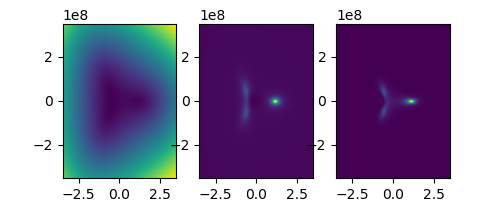

In [138]:
fig, ax = plt.subplots(ncols=3, figsize=(5,2))
ax[0].pcolormesh(bs.Kx, bs.Ky, bs.E[2])
ax[1].pcolormesh(bs.Kx, bs.Ky, bs.Omega[2])
ax[2].pcolormesh(bs.Kx, bs.Ky, 1 / bs.E[2]**3 / m)